## 가중치 감소 weight decay 
- **오버피팅을 억제해 범용 성능을 높이는 테크닉**
- 가중치 매개변수의 값이 작아지도록 학습 -> 가중치를 작게 만들고 싶으면 초깃값도 최대한 작게 시작하는 것이 정석.
- 현재 예제에선 표준편차가 0.01인 정규분포를 사용했음
- 하지만 가중치를 0으로 설정하면 학습이 올바르게 이뤄지지 않는다.
    (정확히는 가중치를 균일한 값으로 설정해서는 안된다.)
- 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문.
    가중치가 고르게 되는 것을 막기 위해서는 초깃값을 무작위로 설정해야 한다.

In [100]:
def show_histogram(activation=None, weight=None):
    # coding: utf-8
    import numpy as np
    import matplotlib.pyplot as plt
    
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    def ReLU(x):
        return np.maximum(0, x)


    def tanh(x):
        return np.tanh(x)

    input_data = np.random.randn(1000, 100)  # 1000개의 데이터
    node_num = 100  # 각 은닉층의 노드(뉴런) 수
    hidden_layer_size = 5  # 은닉층이 5개
    activations = {}  # 이곳에 활성화 결과를 저장
    
    x = input_data
    w = np.random.randn(node_num, node_num) * 1


    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]
        if weight == 1:
            w = np.random.randn(node_num, node_num) * 1
        elif weight == 0.01:
            w = np.random.randn(node_num, node_num) * 0.01
        elif weight == "xavier":
            w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
        elif weight == "he":
            w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


        a = np.dot(x, w)


        # 활성화 함수도 바꿔가며 실험해보자！
        if activation == 'sigmoid':
            z = sigmoid(a)
        elif activation == 'ReLU':
            z = ReLU(a)
        elif activation == 'tanh':
            z = tanh(a)

        activations[i] = z
        
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        # plt.xlim(0.1, 1)
        # plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

##  weight = 1 

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.
시그모이드는 출력이 0, 1에 가까워지면 미분값은 0에 가까워지기 때문에 역전파의 기울기 값이 점점 작아지다가 사라진다. 
이를 기울기 소실gradient vanishing이라고 한다.
층을 깊게 하는 딥러닝에서는 기울기 소실이 더 큰 문제가 될 수 있다.

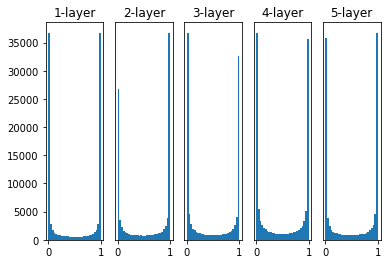

In [110]:
show_histogram(activation='sigmoid', weight=1)

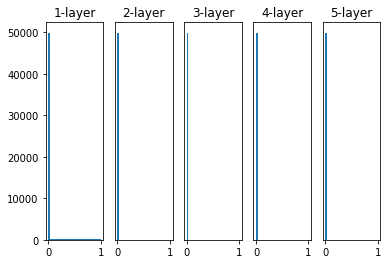

In [98]:
show_histogram(activation='ReLU', weight=1)

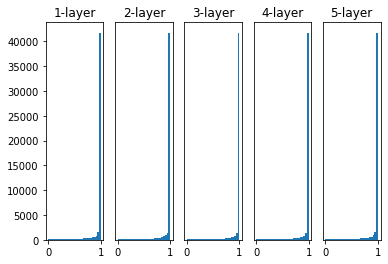

In [99]:
show_histogram(activation='tanh', weight=1)

## weight = 0.01

가중치의 표준편차를 0.01로 바꾸면 활성화값은 0.5에 치우쳐져 있다.
활성화값이 치우치면 기울기 소실은 일어나지 않지만 표현력 관점에서 문제가 있다.
즉 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다.

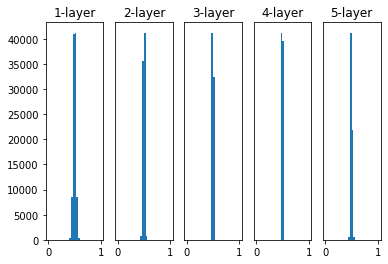

In [101]:
 show_histogram(activation='sigmoid', weight=0.01)

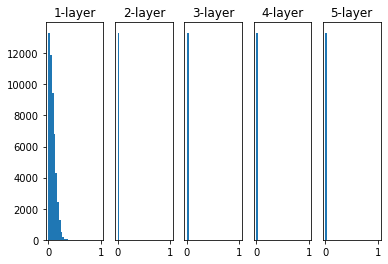

In [102]:
show_histogram(activation='tanh', weight=0.01)

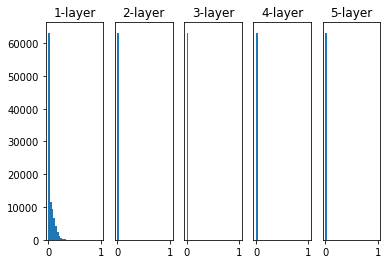

In [103]:
show_histogram(activation='ReLU', weight=0.01)

## weight = xaiver 

따라서 활성화 값은 골고루 분포되어야 한다.
사비에르 글로로트와 요슈아 벤지오는 논문에서 Xavier 초깃값을 권장했으며 일반적인
딥러닝 프레임워크들이 표준적으로 사용하고 있다.
Xavier 초깃값 : 초깃값의 표준편차가 1/√n이 되도록 설정
n : 앞 층의 노드 수

Xavier 초깃값의 분포를 보면 층이 깊어지면 형태가 일그러지지만 앞선 방식들보다 넓게 분포한다.
NOTE : 층이 깊어지면 일그러지는 현상은 sigmoid 함수 대신 tanh(쌍곡선 함수)를 이용하면
개선된다. tanh 함수도 S자 곡선이지만 (0, 0.5)에서 대칭인 시그모이드와는 다르게 원점 대칭이다.
활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다.

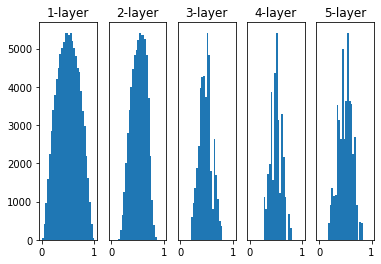

In [104]:
show_histogram(activation='sigmoid', weight='xavier')

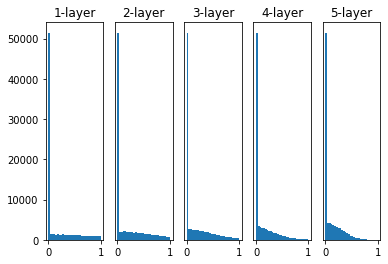

In [105]:
show_histogram(activation='ReLU', weight='xavier')

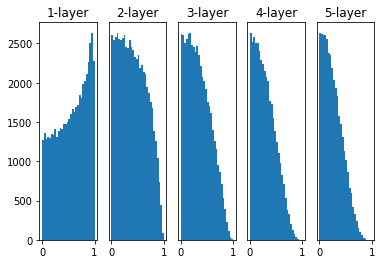

In [106]:
show_histogram(activation='tanh', weight='xavier')

### weight = 'he' 

In [ ]:
# 6.2.3 ReLU를 사용할 때의 가중치 초깃값
"""
Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 한다. 좌우 대칭인 함수는 중앙 부근이 선형이라
볼 수 있어서 Xavier 초깃값이 적당하다. 반면 ReLU를 이용할 때는 이에 특화된 초깃값을 권장한다.
이 초깃값을 발견자 카이밍 히의 이름을 따 He 초깃값이라고 한다.
He 초깃값 : 초깃값의 표준편차가 √(2/n)이 되도록 설정(Xavier의 2배)
n : 앞 층의 노드 수
ReLU는 음수가 0이므로 더 넓게 퍼트리기 위해 계수가 2배여야 한다고 해석할 수 있다.
ReLU를 사용한 경우, 0.01, xavier, He를 사용했을 때
0.01은 활성화 값이 아주 작아 기울기 소실이 발생하며
Xavier는 층이 깊어질 수록 치우침이 커진다.
He는 모든 층에서 균일하게 분포되었다.
"""

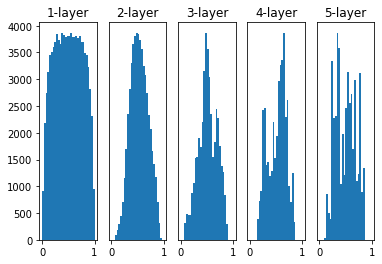

In [97]:
show_histogram(activation='sigmoid', weight='he')

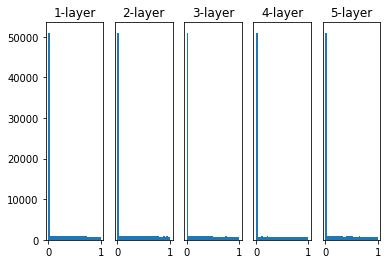

In [107]:
show_histogram(activation='ReLU', weight='he')

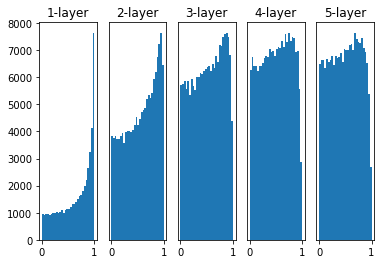

In [108]:
show_histogram(activation='tanh', weight='he')